In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ADITI TIWARY\Downloads\razorpay_customer_churn_data_final.csv")

In [4]:
# Check the shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Display the first 5 rows of the dataset
print("\nFirst 5 rows:")
print(df.head())

# Get detailed information about the dataset (column names, data types, non-null counts)
print("\nDataset Info:")
print(df.info())


Dataset Shape: (10000, 28)

First 5 rows:
  Merchant_ID      Merchant_Name         Industry Merchant_Segment  \
0      M-1000             Upstox           Retail           Medium   
1      M-1001             Subway        Education           Medium   
2      M-1002             Zomato  Food & Beverage            Small   
3      M-1003              FedEx        Education           Medium   
4      M-1004  Subway (Branch 2)      Hospitality           Medium   

  Location_Region Subscription_Start_Date  Months_Since_Subscription  \
0           South              22-09-2023                          3   
1            East              29-11-2023                          1   
2           South              11-03-2023                          9   
3         Central              20-08-2023                          4   
4           South              14-06-2023                          6   

       POS_Terminal_Model  Avg_Monthly_Transaction_Volume  \
0                Soundbox                  

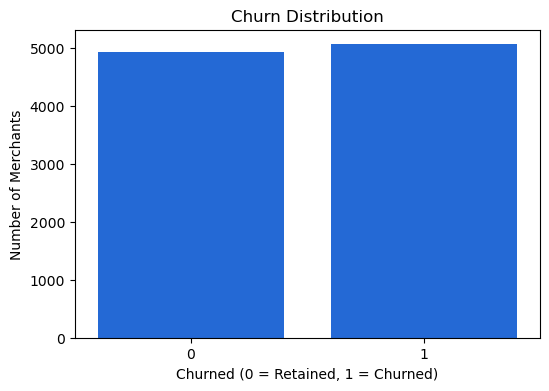

In [5]:
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns           # For statistical visualizations

# -------------------------------
# 1. Churn Distribution
# -------------------------------
# This plot shows how many merchants are retained (Churned=0) versus churned (Churned=1).
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churned', data=df, color="#0762F2")
plt.title("Churn Distribution")
plt.xlabel("Churned (0 = Retained, 1 = Churned)")
plt.ylabel("Number of Merchants")
plt.show()

In [6]:
# Calculate churn counts using value_counts()
churn_table = df['Churned'].value_counts().rename_axis('Churn Status').reset_index(name='Total Merchants')

# Map numeric values to descriptive labels for clarity
churn_table['Churn Status'] = churn_table['Churn Status'].map({0: 'Not Churned', 1: 'Churned'})

# Display the churn counts table
print(churn_table)

  Churn Status  Total Merchants
0      Churned             5063
1  Not Churned             4937


In [7]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ADITI TIWARY\Downloads\razorpay_customer_churn_data_final.csv")
churn_rate = (df['Churned'].mean()) * 100
retention_rate = 100 - churn_rate
print(f"Churn Rate: {churn_rate:.2f}%")
print(f"Retention Rate: {retention_rate:.2f}%")

Churn Rate: 50.63%
Retention Rate: 49.37%


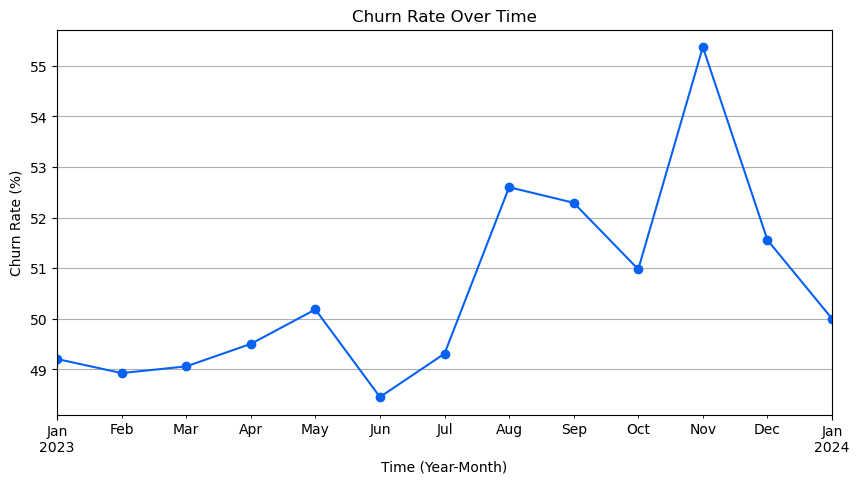

In [8]:
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'], dayfirst=True)

# Extract year-month from dates
df['YearMonth'] = df['Subscription_Start_Date'].dt.to_period('M')

# Churn trend over time
churn_trend = df.groupby('YearMonth')['Churned'].mean() * 100

# Plot churn rate trend over time
plt.figure(figsize=(10, 5))
churn_trend.plot(marker='o', color='#0762F2')
plt.title("Churn Rate Over Time")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Churn Rate (%)")
plt.grid()
plt.show()

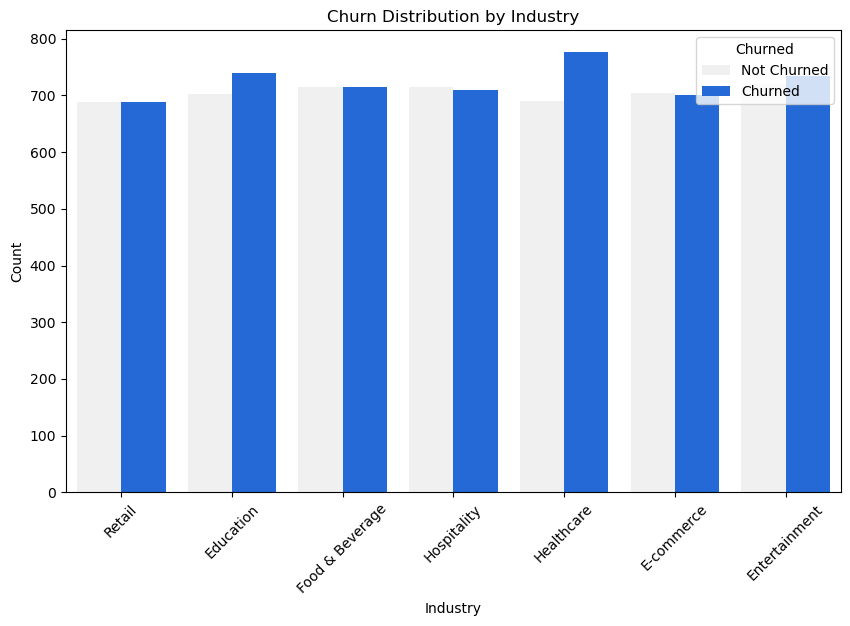

In [9]:
# -------------------------------
# 2. Churn Distribution by Industry
# -------------------------------
# This helps us understand which industries have higher churn rates.

# Define a custom palette: Off white for "Not Churned" (0) and Razorpay blue for "Churned" (1)
custom_palette = {0: "#F0F0F0", 1: "#0762F2"}

# Create the count plot with the custom color palette
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Industry', hue='Churned', data=df, palette=custom_palette)
plt.title("Churn Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate industry labels for better readability
plt.legend(title="Churned", labels=["Not Churned", "Churned"])
plt.show()

In [10]:
# let's compute the count of churned and non-churned merchants by industry
churn_by_industry = df.groupby(['Industry', 'Churned']).size().reset_index(name='Count')
print(churn_by_industry)

           Industry  Churned  Count
0        E-commerce        0    705
1        E-commerce        1    700
2         Education        0    703
3         Education        1    740
4     Entertainment        0    720
5     Entertainment        1    734
6   Food & Beverage        0    715
7   Food & Beverage        1    715
8        Healthcare        0    690
9        Healthcare        1    776
10      Hospitality        0    715
11      Hospitality        1    710
12           Retail        0    689
13           Retail        1    688


In [11]:
# Calculate churn rate by industry
churn_by_industry = df.groupby('Industry')['Churned'].mean() * 100

# Calculate retention rate by subtracting churn rate from 100%
retention_by_industry = 100 - churn_by_industry

# Display results
print("Churn Rate by Industry (%):")
print(churn_by_industry)

print("\nRetention Rate by Industry (%):")
print(retention_by_industry)

Churn Rate by Industry (%):
Industry
E-commerce         49.822064
Education          51.282051
Entertainment      50.481431
Food & Beverage    50.000000
Healthcare         52.933151
Hospitality        49.824561
Retail             49.963689
Name: Churned, dtype: float64

Retention Rate by Industry (%):
Industry
E-commerce         50.177936
Education          48.717949
Entertainment      49.518569
Food & Beverage    50.000000
Healthcare         47.066849
Hospitality        50.175439
Retail             50.036311
Name: Churned, dtype: float64


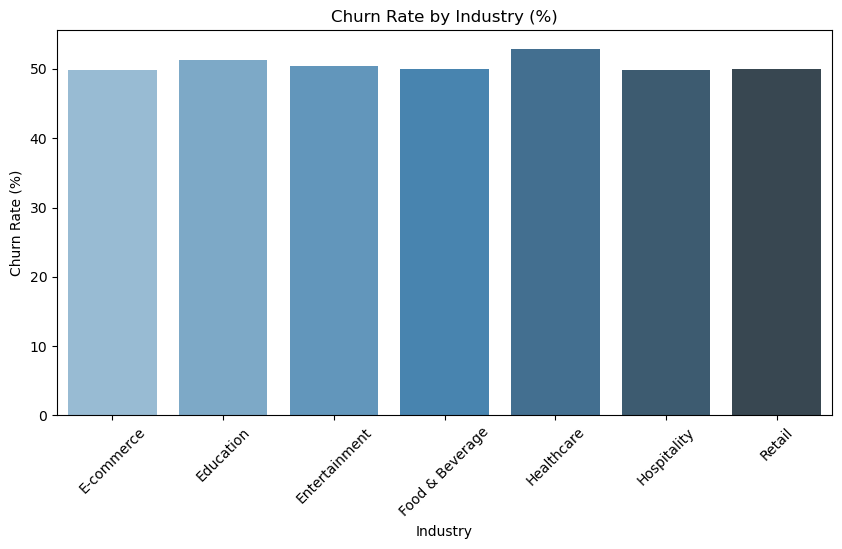

In [12]:
# Plot churn rate by industry
plt.figure(figsize=(10, 5))
sns.barplot(x=churn_by_industry.index, y=churn_by_industry.values, hue=churn_by_industry.index, palette="Blues_d", legend=False)
plt.title("Churn Rate by Industry (%)")
plt.xlabel("Industry")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

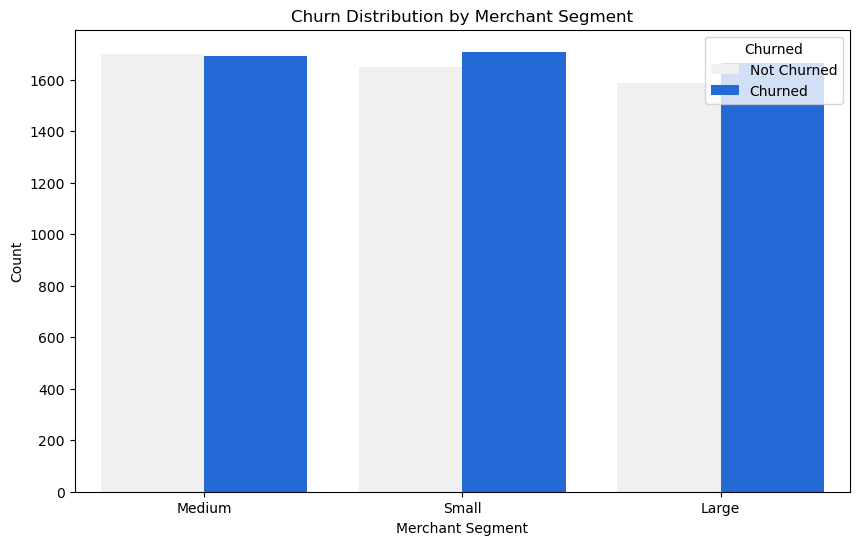

In [13]:
# 3. Churn Distribution by Merchant Segment
# --------------------------------
# Define the custom palette with Razorpay blue for churned and off-white for not churned
custom_palette = {0: "#F0F0F0", 1: "#0762F2"}

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Merchant_Segment', hue='Churned', data=df, palette=custom_palette)
plt.title("Churn Distribution by Merchant Segment")
plt.xlabel("Merchant Segment")
plt.ylabel("Count")
plt.legend(title="Churned", labels=["Not Churned", "Churned"])
plt.show()

In [14]:
# Count Values for Churn Distribution by Merchant Segment
# -------------------------------
# Group the data by 'Merchant_Segment' and 'Churned', count the occurrences,
# then reset the index to get a clean DataFrame.
churn_by_segment = df.groupby(['Merchant_Segment', 'Churned']).size().reset_index(name='Count')

# Map numeric churn status to descriptive labels for clarity
churn_by_segment['Churned'] = churn_by_segment['Churned'].map({0: 'Not Churned', 1: 'Churned'})

print("Churn Distribution by Merchant Segment:")
print(churn_by_segment)

Churn Distribution by Merchant Segment:
  Merchant_Segment      Churned  Count
0            Large  Not Churned   1588
1            Large      Churned   1663
2           Medium  Not Churned   1699
3           Medium      Churned   1692
4            Small  Not Churned   1650
5            Small      Churned   1708


Churn Rate by Merchant Segment (%):
Merchant_Segment
Large     51.153491
Medium    49.896786
Small     50.863609
Name: Churned, dtype: float64


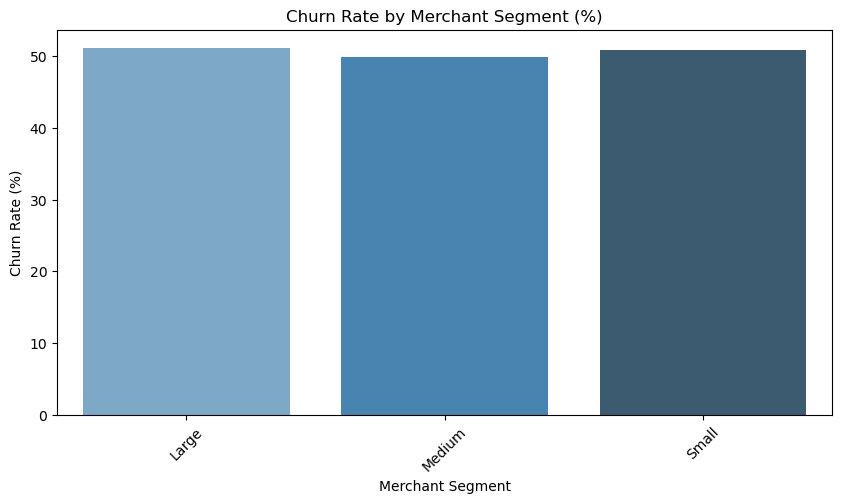

In [15]:
# Calculate churn rate by merchant segment
churn_by_segment = df.groupby('Merchant_Segment')['Churned'].mean() * 100

# Display results
print("Churn Rate by Merchant Segment (%):")
print(churn_by_segment)

# Plot churn rate by merchant segment
plt.figure(figsize=(10, 5))
sns.barplot(x=churn_by_segment.index, y=churn_by_segment.values, hue=churn_by_segment.index, palette="Blues_d", legend=False)
plt.title("Churn Rate by Merchant Segment (%)")
plt.xlabel("Merchant Segment")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

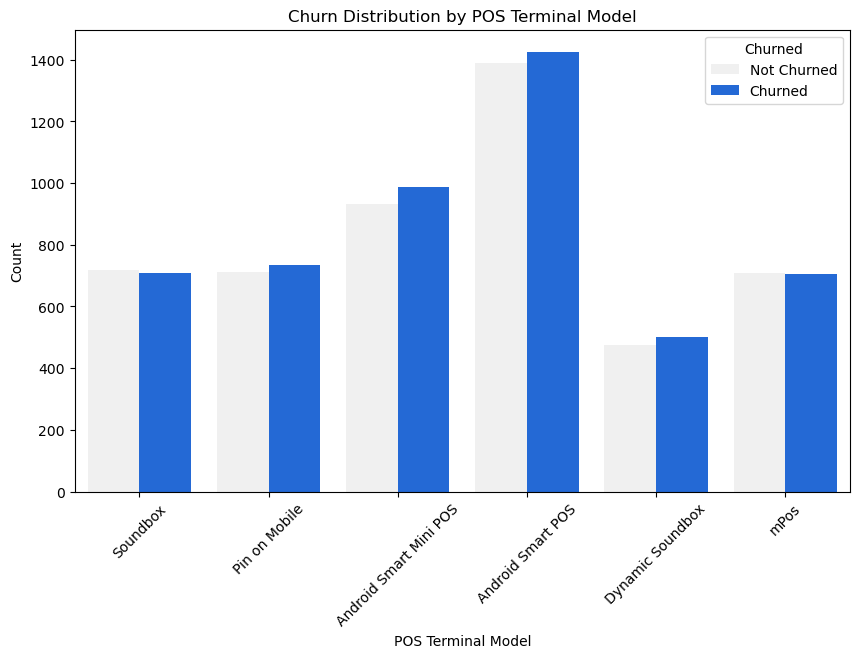

In [16]:
# 4. Churn Distribution by POS Terminal Model
# -------------------------------
# Visualizing churn across different POS terminal models can reveal if certain models are associated with higher churn.
plt.figure(figsize=(10,6))
ax = sns.countplot(x='POS_Terminal_Model', hue='Churned', data=df, palette=custom_palette)
plt.title("Churn Distribution by POS Terminal Model")
plt.xlabel("POS Terminal Model")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title="Churned", labels=["Not Churned", "Churned"])
plt.show()

In [17]:
# Count Values for Churn Distribution by POS Terminal Model
# -------------------------------
churn_by_pos = df.groupby(['POS_Terminal_Model', 'Churned']).size().reset_index(name='Count')

# Map numeric churn status to descriptive labels
churn_by_pos['Churned'] = churn_by_pos['Churned'].map({0: 'Not Churned', 1: 'Churned'})

print("\nChurn Distribution by POS Terminal Model:")
print(churn_by_pos)


Churn Distribution by POS Terminal Model:
        POS_Terminal_Model      Churned  Count
0   Android Smart Mini POS  Not Churned    933
1   Android Smart Mini POS      Churned    987
2        Android Smart POS  Not Churned   1390
3        Android Smart POS      Churned   1426
4         Dynamic Soundbox  Not Churned    475
5         Dynamic Soundbox      Churned    502
6            Pin on Mobile  Not Churned    712
7            Pin on Mobile      Churned    733
8                 Soundbox  Not Churned    719
9                 Soundbox      Churned    709
10                    mPos  Not Churned    708
11                    mPos      Churned    706


Churn Rate by POS Terminal Model (%):
POS_Terminal_Model
Android Smart Mini POS    51.406250
Android Smart POS         50.639205
Dynamic Soundbox          51.381781
Pin on Mobile             50.726644
Soundbox                  49.649860
mPos                      49.929279
Name: Churned, dtype: float64


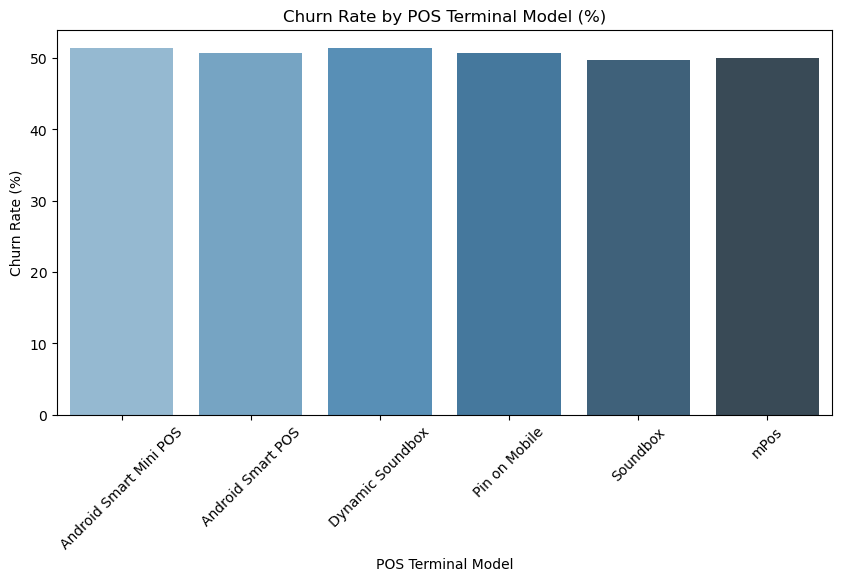

In [18]:
# Calculate churn rate by POS terminal model
churn_by_pos = df.groupby('POS_Terminal_Model')['Churned'].mean() * 100

# Display results
print("Churn Rate by POS Terminal Model (%):")
print(churn_by_pos)

# Plot churn rate by POS terminal model
plt.figure(figsize=(10, 5))
sns.barplot(x=churn_by_pos.index, y=churn_by_pos.values, hue=churn_by_pos.index, palette="Blues_d", legend=False)
plt.title("Churn Rate by POS Terminal Model (%)")
plt.xlabel("POS Terminal Model")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

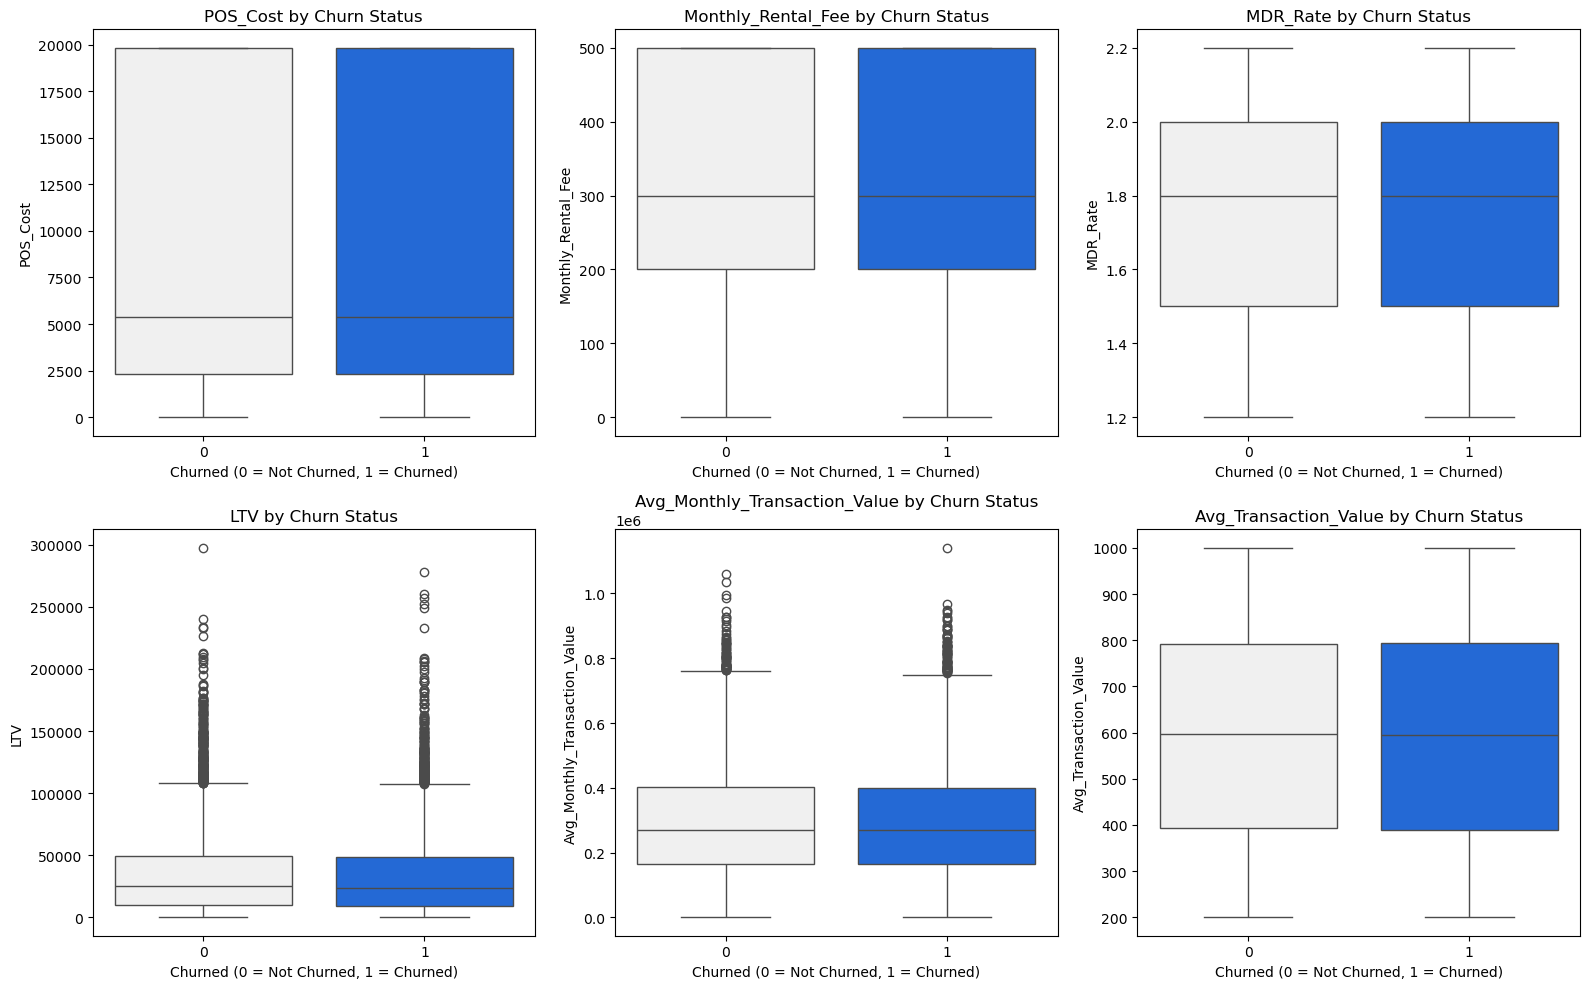

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define key features to analyze
key_features = [
    "POS_Cost", 
    "Monthly_Rental_Fee", 
    "MDR_Rate", 
    "LTV", 
    "Avg_Monthly_Transaction_Value", 
    "Avg_Transaction_Value"
]

# Define the custom palette with string keys (off-white for not churned, Razorpay blue for churned)
custom_palette = {"0": "#F0F0F0", "1": "#0762F2"}

plt.figure(figsize=(16, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    # Ensure the 'Churned' column is of type string for proper palette mapping.
    # Here, we use hue='Churned' and set dodge=False to keep one box per category.
    sns.boxplot(
        x="Churned", 
        y=feature, 
        data=df.assign(Churned=df["Churned"].astype(str)), 
        hue="Churned", 
        palette=custom_palette, 
        dodge=False
    )
    plt.title(f"{feature} by Churn Status")
    plt.xlabel("Churned (0 = Not Churned, 1 = Churned)")
    plt.ylabel(feature)
    # Remove the duplicate legend as it's no longer needed.
    plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


## Correlation Analysis

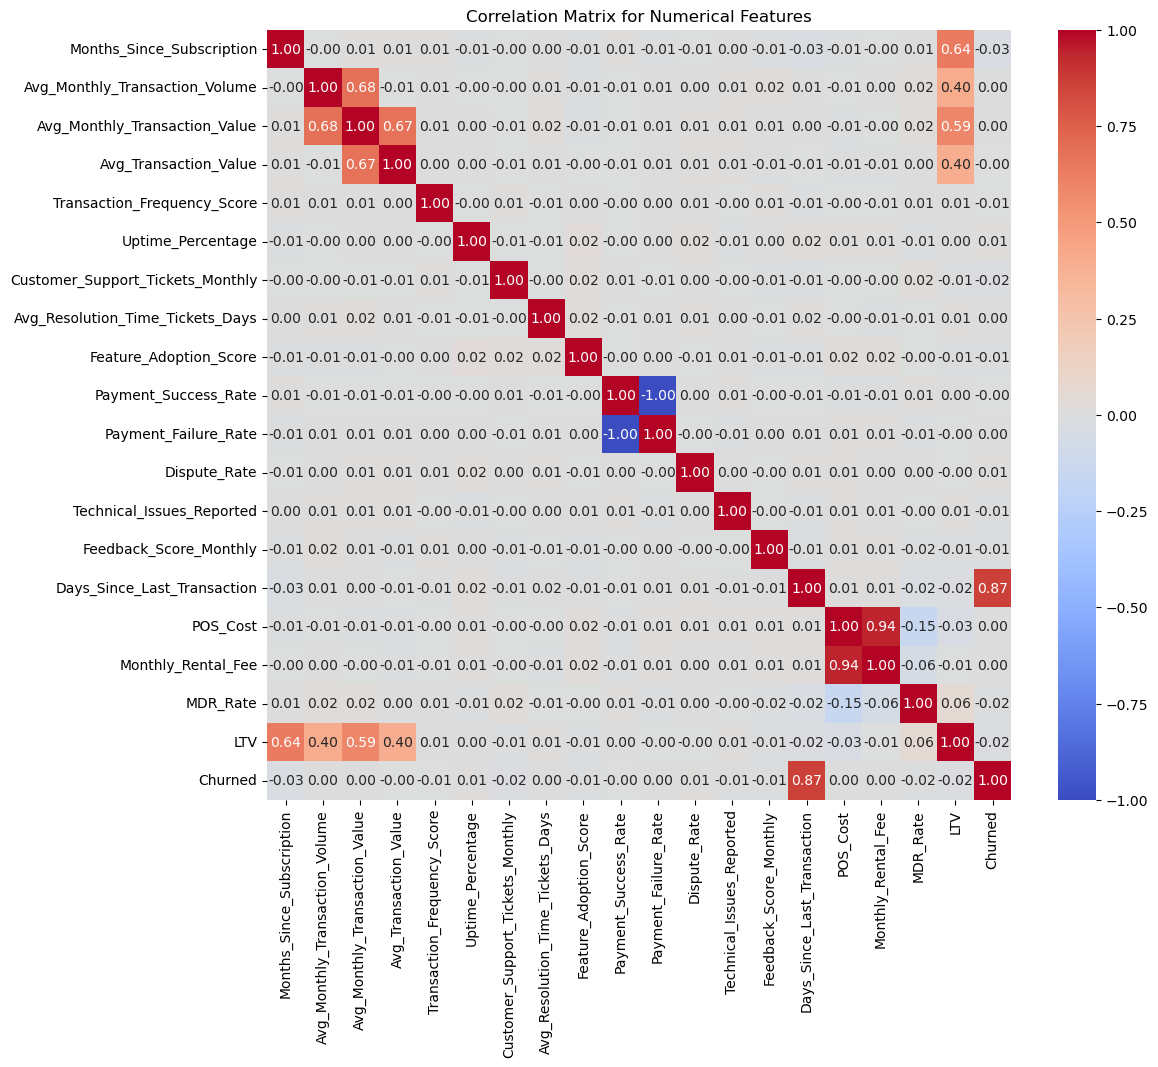

In [21]:
import numpy as np
# Select only numeric columns from df
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix on the numeric columns
corr_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

## Predictive Modeling

In [23]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [24]:
# 1. Select Features
features = ['POS_Cost', 'Monthly_Rental_Fee', 'MDR_Rate', 'LTV', 
            'Avg_Monthly_Transaction_Value', 'Avg_Transaction_Value']
X = df[features]  # Independent variables (predictors)
y = df['Churned'] # Dependent variable (target: 0 or 1)

In [25]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,     # 20% of data goes to test set
    random_state=42    # Ensures reproducible results
)

In [26]:
# 3. Standardize Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# 4. Build and Train the Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if you get convergence warnings
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# 5. Make Predictions on the Test Set
y_pred = logreg.predict(X_test_scaled)

In [29]:
# 6. Evaluate the Model

# 6a. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43       982
           1       0.51      0.63      0.56      1018

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.51      0.50      2000



In [30]:
# 6b. Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[373 609]
 [380 638]]


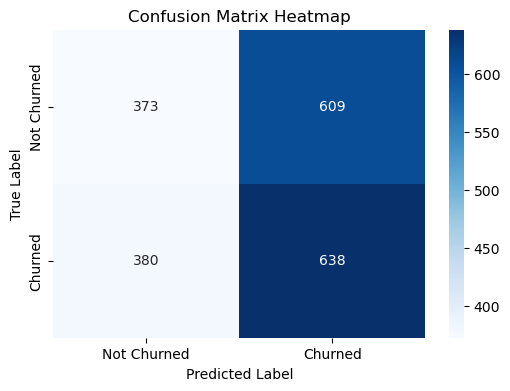

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])

# Titles and labels
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()

In [32]:
# 6c. ROC AUC Score
y_probs = logreg.predict_proba(X_test_scaled)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

ROC AUC Score: 0.5128071495164432


## Model Interpretation

In [34]:
# Logistic Regression Coefficients

coefficients = pd.DataFrame(logreg.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                               Coefficient
POS_Cost                         -0.003990
Monthly_Rental_Fee               -0.009260
MDR_Rate                         -0.022646
LTV                              -0.066165
Avg_Monthly_Transaction_Value     0.069490
Avg_Transaction_Value            -0.021461


In [35]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'C': 0.01}
Best score: 0.5075923671589685


## Random Forest Model

In [37]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [38]:
# 1. Instantiate the RandomForestClassifier
# n_estimators: number of trees in the forest
# random_state: ensures reproducible results
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
# 2. Fit the model on the training set
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# 3. Make predictions on the test set
y_pred_rf = rf.predict(X_test)

In [41]:
# 4. Evaluate
print("=== Random Forest Evaluation ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

=== Random Forest Evaluation ===
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       982
           1       0.51      0.49      0.50      1018

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

Confusion Matrix:
[[502 480]
 [521 497]]


In [42]:
# 5. Probability scores for ROC AUC
y_probs_rf = rf.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_probs_rf))

ROC AUC Score: 0.4872363645821246


In [43]:
# Get feature importances from the trained RandomForest model
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
4  Avg_Monthly_Transaction_Value    0.320485
5          Avg_Transaction_Value    0.315784
3                            LTV    0.298030
2                       MDR_Rate    0.028830
1             Monthly_Rental_Fee    0.018696
0                       POS_Cost    0.018174


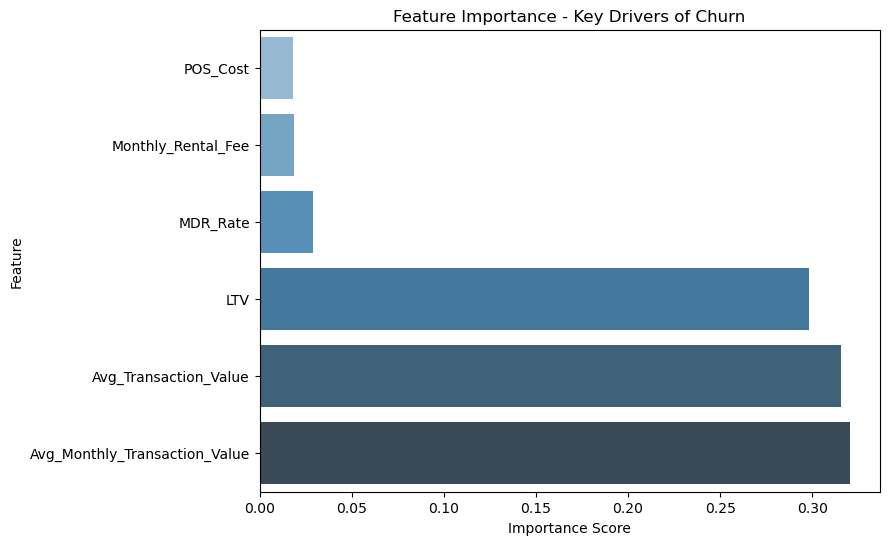

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)

# Plot with explicit hue assignment
plt.figure(figsize=(8,6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df, 
    hue='Feature',  # Assign hue explicitly
    palette="Blues_d", 
    legend=False  # Remove unnecessary legend
)
plt.title("Feature Importance - Key Drivers of Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [45]:
import numpy as np

# Select only numerical columns
numeric_features = df.select_dtypes(include=[np.number])

# Compute correlation with churn
churn_correlation = numeric_features.corr()['Churned'].sort_values(ascending=False)
print("Correlation of Features with Churn:")
print(churn_correlation)

Correlation of Features with Churn:
Churned                             1.000000
Days_Since_Last_Transaction         0.866257
Uptime_Percentage                   0.013951
Dispute_Rate                        0.011241
Avg_Monthly_Transaction_Volume      0.004798
POS_Cost                            0.004120
Avg_Resolution_Time_Tickets_Days    0.003866
Monthly_Rental_Fee                  0.002591
Payment_Failure_Rate                0.002258
Avg_Monthly_Transaction_Value       0.001351
Payment_Success_Rate               -0.002258
Avg_Transaction_Value              -0.004957
Transaction_Frequency_Score        -0.005794
Feedback_Score_Monthly             -0.009992
Feature_Adoption_Score             -0.010685
Technical_Issues_Reported          -0.014314
MDR_Rate                           -0.015580
Customer_Support_Tickets_Monthly   -0.018123
LTV                                -0.022826
Months_Since_Subscription          -0.029910
Name: Churned, dtype: float64


In [46]:
# Compare means of key numerical features for churned vs. not churned
churned_vs_not = df.groupby('Churned')[['POS_Cost', 'Monthly_Rental_Fee', 'MDR_Rate', 'LTV', 'Avg_Monthly_Transaction_Value']].mean()

print("Average Values for Churned vs. Non-Churned Merchants:")
print(churned_vs_not)

Average Values for Churned vs. Non-Churned Merchants:
            POS_Cost  Monthly_Rental_Fee  MDR_Rate           LTV  \
Churned                                                            
0        9742.710148          312.568361  1.786632  35494.839588   
1        9806.668971          313.430772  1.776852  33918.269743   

         Avg_Monthly_Transaction_Value  
Churned                                 
0                        298621.848388  
1                        299086.609152  


### Interaction Effects

Churn Rate for High POS Cost & Low Transactions:
High_Cost_Low_Transaction
False    50.695356
True     50.420521
Name: Churned, dtype: float64


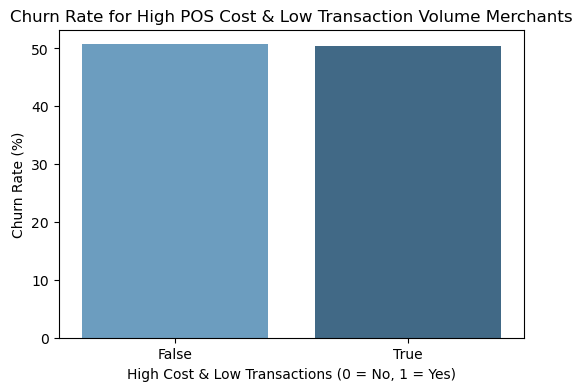

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create interaction feature
df['High_Cost_Low_Transaction'] = (df['POS_Cost'] > df['POS_Cost'].median()) & (df['Avg_Monthly_Transaction_Value'] < df['Avg_Monthly_Transaction_Value'].median())

# Group by interaction effect
interaction_churn = df.groupby('High_Cost_Low_Transaction')['Churned'].mean() * 100

# Display churn rate for interaction groups
print("Churn Rate for High POS Cost & Low Transactions:")
print(interaction_churn)

# Plot churn rate for interaction effect
plt.figure(figsize=(6,4))
sns.barplot(
    x=interaction_churn.index, 
    y=interaction_churn.values, 
    hue=interaction_churn.index,  # Explicitly assign hue
    palette="Blues_d", 
    legend=False  # Remove unnecessary legend
)
plt.title("Churn Rate for High POS Cost & Low Transaction Volume Merchants")
plt.xlabel("High Cost & Low Transactions (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate (%)")
plt.show()